#Langkah 0 - Download Dataset

In [1]:
from IPython.display import clear_output
!pip install gdown
clear_output()
!gdown --id "1ZRRcXEQBc5eiiSHtO7FXAEkfbQprMZZP"

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ZRRcXEQBc5eiiSHtO7FXAEkfbQprMZZP
To: /content/Iris.csv
100% 5.11k/5.11k [00:00<00:00, 19.7MB/s]


#Langkah 1 - Import Library



In [2]:
# Import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#Langkah 2 - Load dan Inspeksi Data


In [3]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#Langkah 3 - Seleksi Fitur
Dikarenakan kita hanya membutuhkan fitur untuk proses klasterisasi, maka kita perlu memisahkan antara fitur dan label dengan menggunakan proses slicing data.

In [5]:
# Features Selection
X = df.iloc[:, 1:-1] # slice the features
y = df.iloc[:, -1] # this is the labels (we don't need it)

In [6]:
print(X.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


#Langkah 4 - Plotting
Pada tahap ini, kita akan melakukan proses plot menggunakan scatter plot untuk melihat sebaran data berdasarkan 2 fitur, yaitu SepalLengthCm dan SepalWidthCm.

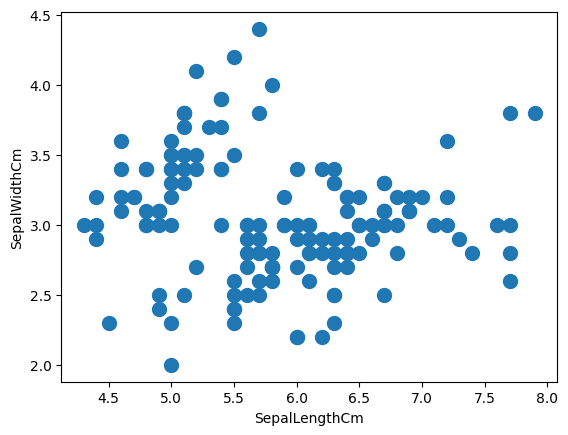

In [7]:
# Make a scatterplot using
# SepalLengthCm and SepalWidthCm
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

#Langkah 5 - Membuat Model K-Means
Selanjutnya, kita akan membuat model K-Means dengan asumsi terdapat dua cluster sesuai dengan amatan visual pada scatterplot.

In [8]:
# Build a K-Means Model
# Based on visual inspection using scatterplot,
# we can assumpt that the data has 2 cluster
# (even though, from the label, there are 3 labels in this data)

from sklearn.cluster import KMeans

# Initiate K-Means object with numbur of cluster is 2
cl_kmeans = KMeans(n_clusters=2)

# Fit and predict
y_kmeans = cl_kmeans.fit_predict(X)

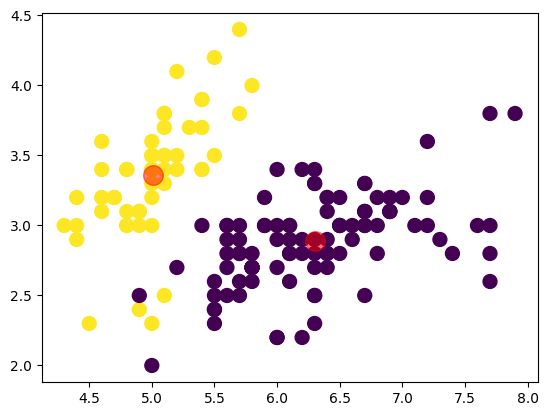

In [9]:
# Plot the clustering result
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot the centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

#Langkah 6 - Evaluasi Model
Untuk mengetahui apakah model klasterisasi yang dihasilkan memiliki performa yang baik, maka kita akan melakukan proses evaluasi. Nilai metrik evaluasi yang dapat kita gunakan salah satunya adalah sum of square error (SSE). Untuk mendapatkan nilai SSE, kita cukup mengakses properti inertia_ dari objek K-Means yang telah dilatih sebelumnya.

In [10]:
# Print SSE value
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


#Langkah 7 - Menentukan k terbaik dengan Elbow Method

Pada pembuatan model klasterisasi, jika kita masih belum menentukan jumlah cluster yang akan digunakan, maka kita dapat menggunakan elbow method untuk mendapatkan jumlah cluster yang terbaik. Cara kerja elbow method cukup sederhana, yaitu,

Tentukan rentang k yang ingin dievaluasi.

Kalkulasi nilai SSE untuk setiap nilai k pada rentang yang telah ditentukan.

Buat grafik lineplot untuk mendapatkan visualisasi sebagai dasar justifikasi.

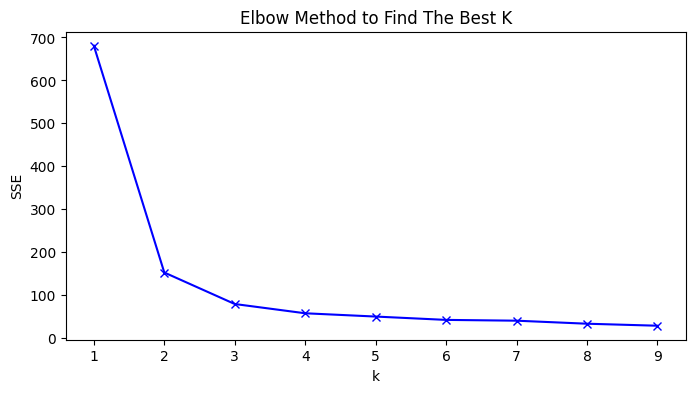

In [11]:
D

Berdasarkan hasil lineplot SSE untuk setiap k, maka kita dapat berargumen bahwa nilai k
k terbaik adalah 3. Mengapa k=3? Hal ini dikarenakan pada nilai k=2 nilai SSE masih terlalu tinggi dibandingkan dengan k=4, sedangkan, misal k=8 sangat rendah. Jumlah cluster terbaik bukan karena nilai SSE yang rendah. SSE pasti aka semakin mengecil seiring dengan jumlah cluster yang dihasilkan. Hal ini dikarenakan jumlah anggota tiap cluster juga semakin mengecil dan cluster otomatis lebih sempit. Dalam konteks ini, kita harus dapat menemukan posisi dimana nilai k telah turun dengan tajam diikuti dengan penurunan yang lebih stabil. Posisi inilah yang dikenal dengan posisi "elbow". Dalam konteks fitur yang kita gunakan saat ini, nilai k=3 menjadi nilai yang paling optimal.